In [25]:
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [26]:
#读取站点文件
path = r'C:\Users\zzsgdsg7\Desktop\network1.xlsx'
Save_filename = r'network_dis.csv'
Save_path =  r'C:\Users\zzsgdsg7\Desktop'


In [27]:
f = pd.read_excel(path)

#station_number = f.iloc[:, [0]]  # 后面要加“[]”，不然就自动转换成了series类型，不能使用iloc函数了
station_name = f.iloc[:, [0]]
lat = f.iloc[:, [4]]
long = f.iloc[:, [3]]
height = f.iloc[:,6]
for i in range(len(station_name)):
    print(station_name.loc[0])


Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0, dtype: object
Id    1431A
Name: 0,

测量节点之间的距离和海拔差

In [28]:
#定义函数（读取文件各列信息）
def read_file(adress):
    f = pd.read_excel(adress)
    print(f.iloc[:, [0, 1, 3, 4]])
    #station_number = f.iloc[:, [0]]  # 后面要加“[]”，不然就自动转换成了series类型，不能使用iloc函数了
    station_name = f.iloc[:, [0]]
    lat = f.iloc[:, [4]]
    long = f.iloc[:, [3]]
    height = f.iloc[:,6]
    return station_name, lat, long,height

# 由经纬度计算节点之间的距离
def jisuan_jiedian_juli(path):
    station_name, lat, long, height = read_file(path)
    stage = [] # 定义列表，存放每两个站点之间的距离
    for i in range(len(station_name)):
        for j in range(i+1, len(station_name)):
            lat1 = jiaodu_zhuanhuan_hudu(lat.iloc[i, 0])
            lat2 = jiaodu_zhuanhuan_hudu(lat.iloc[j, 0])
            long1 = jiaodu_zhuanhuan_hudu(long.iloc[i, 0])
            long2 = jiaodu_zhuanhuan_hudu(long.iloc[j, 0])
            
            #计算海拔差
            site1_height = height.iloc[i]
            site2_height = height.iloc[j]
            dis = site1_height - site2_height
            
            #计算斯皮尔曼系数
            #overall_pearson_r = AQI_data.corr().iloc[i,j]
            
            a = lat1 - lat2  # 纬度差的绝对值
            b = long1 - long2  # 经度差的绝对值
            ant = pow(math.sin(a/2), 2) + math.cos(lat1)*math.cos(lat2)*pow(math.sin(b/2), 2)  # 公式
            s = 2*6378.137*math.asin(pow(ant, 0.5))
            
            stage.append([station_name.iloc[i],station_name.iloc[j], s, dis])
    print(stage)
    f = pd.DataFrame(stage, columns=["from", "to", "cost",'hight'])
    f.to_csv(Save_path + "\\" + Save_filename, encoding="utf_8_sig")  # 保存成.csv文件

#经纬度的角度转换弧度
def jiaodu_zhuanhuan_hudu(degree_minute):
    degree = degree_minute #// 100   度
    #minute = degree_minute % 100  # 分
    #degree = degree + minute / 60  # 将分转换为度，并相加
    #degree = float("%.2f" % degree)  # 保留两位小数

    rad = degree * math.pi / 180
    return rad

In [30]:
if __name__ == "__main__":
    jisuan_jiedian_juli(path)
    print("finish!")

       Id    label           L          W
0   1431A     金泉两河  103.972750  30.723583
1   1432A      十里店  104.176000  30.687200
2   1433A      三瓦窑  104.079000  30.570600
3   1434A      沙河铺  104.111389  30.630000
4   1435A      梁家巷  104.074000  30.685000
..    ...      ...         ...        ...
95  2914A      苏山坪  106.751389  31.878889
96  2915A     职业中学  106.761944  31.858056
97  3027A     青杠林路  104.722800  29.339720
98  3028A   檀木林体育馆  104.777800  29.360280
99  3136A  龙泉驿区区政府  104.272500  30.558900

[100 rows x 4 columns]
[[Id    1431A
Name: 0, dtype: object, Id    1432A
Name: 1, dtype: object, 19.870800133255635, 22], [Id    1431A
Name: 0, dtype: object, Id    1433A
Name: 2, dtype: object, 19.83848218191006, 19], [Id    1431A
Name: 0, dtype: object, Id    1434A
Name: 3, dtype: object, 16.8734222371898, 16], [Id    1431A
Name: 0, dtype: object, Id    1435A
Name: 4, dtype: object, 10.60019300308469, 13], [Id    1431A
Name: 0, dtype: object, Id    1436A
Name: 5, dtype: object, 9.23567604

finish!


标准化的互相关

In [51]:
#读取AQI文件
#path = r'C:\Users\zzsgdsg7\Desktop\AQI2021(1).csv'
#AQI_data = pd.read_csv(path,index_col='time')
#AQI_data.head()

,1431A,1432A,1433A,1434A,1437A,1438A,1878A,1879A,1880A,1881A,...,2902A,2914A,3027A,3028A,3065A,3136A,3137A,3148A,3182A,3183A
time,,,,,,,,,,,,,,,,,,,,,
2021/1/1 0:00,103.000000,68.000000,65.000000,74.000000,69.000000,85.000000,57.000000,79.000000,77.000000,79.000000,...,120.000000,69.000000,117.0,92.000000,28.000000,64.000000,68.000000,65.000000,73.0,65.000000
2021/1/1 1:00,99.000000,68.000000,72.000000,77.000000,79.000000,90.000000,59.000000,79.000000,83.000000,84.000000,...,85.000000,84.000000,114.0,113.000000,23.000000,67.000000,73.000000,70.000000,65.0,67.000000
2021/1/1 2:00,106.769231,86.076923,94.923077,88.076923,95.230769,90.538462,73.230769,84.615385,100.916667,101.692308,...,81.846154,68.538462,104.0,109.538461,28.461538,85.384615,68.692308,70.222222,65.5,61.846154
2021/1/1 3:00,99.000000,70.000000,90.000000,80.000000,90.000000,88.000000,67.000000,85.000000,95.000000,94.000000,...,63.000000,67.000000,105.0,120.000000,23.000000,70.000000,75.000000,70.000000,64.0,64.000000
2021/1/1 4:00,97.000000,73.000000,108.000000,79.000000,97.000000,89.000000,69.000000,88.000000,97.000000,95.000000,...,72.000000,69.000000,97.0,110.000000,26.000000,73.000000,77.000000,77.000000,60.0,63.000000


In [30]:
'''
def norm_cross_corr(set1, set2):
    # python中求Normalized Cross Correlation的函数是: statsmodels.tsa.stattools.ccf
    return np.sum(set1 * set2) / (np.linalg.norm(set1) * np.linalg.norm(set2))

columns = []
cor=[]

for indexs in AQI_data.columns:
    if indexs =='time':
        continue
    columns.append(indexs)

for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        cor.append(norm_cross_corr(AQI_data[columns[i]],AQI_data[columns[j]]))
        
print(cor)
'''

[0.9753402415296283, 0.9701699071673747, 0.9715645407863929, 0.9777053313886117, 0.9178517250195731, 0.9385494920222393, 0.9410798806419804, 0.9440261671752662, 0.9430053369879866, 0.9084531275553018, 0.8993956291158256, 0.9019285433878441, 0.9000603057774286, 0.9114082668898489, 0.8110689112739478, 0.8339294720735013, 0.8603754867034684, 0.8591667424773471, 0.8503264088442075, 0.9060350398763864, 0.9140402082530247, 0.9127140516919064, 0.9030160025183092, 0.8263169446474293, 0.8276756272695196, 0.9579706274266052, 0.9612062991998147, 0.8147574916702527, 0.9589640935595256, 0.9154244582800853, 0.9223863941602166, 0.9235275570785505, 0.926979085298008, 0.9130828900001742, 0.9239878973330339, 0.9055695603700619, 0.902999986463202, 0.8204570776363591, 0.9052673571455321, 0.9254238381675407, 0.934248591851212, 0.9284490455988984, 0.9289844255350812, 0.9083968536842131, 0.9128884513832222, 0.914519671826136, 0.9181645218246703, 0.9311333588055157, 0.9338911102138691, 0.9384873030995701, 0.9

皮尔逊相关系数

In [52]:
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        overall_pearson_r = AQI_data.corr().iloc[i,j]
        print("{0}--{1}".format(i,j),end="")
        print(f"Pandas computed Pearson r: {overall_pearson_r}")

f = pd.DataFrame(overall_pearson_r, columns=["r"])
f.to_csv(Save_path + "\\" + Save_filename, encoding="utf_8_sig")  # 保存成.csv文件

0--1Pandas computed Pearson r: 0.9048983084858142
0--2Pandas computed Pearson r: 0.8878527998033539
0--3Pandas computed Pearson r: 0.8940902902423986
0--4Pandas computed Pearson r: 0.9170420231415489
0--5Pandas computed Pearson r: 0.7001207004434025
0--6Pandas computed Pearson r: 0.7721759835836218
0--7Pandas computed Pearson r: 0.7695902487132148
0--8Pandas computed Pearson r: 0.7872390829512036
0--9Pandas computed Pearson r: 0.7835490029058549
0--10Pandas computed Pearson r: 0.652752507766223
0--11Pandas computed Pearson r: 0.6485800903575433
0--12Pandas computed Pearson r: 0.6343943621950507
0--13Pandas computed Pearson r: 0.6381953258870768
0--14Pandas computed Pearson r: 0.663888817974332
0--15Pandas computed Pearson r: 0.2303006245794385
0--16Pandas computed Pearson r: 0.3297178644647904
0--17Pandas computed Pearson r: 0.3853363931771583
0--18Pandas computed Pearson r: 0.39845903500607116
0--19Pandas computed Pearson r: 0.36631201190385776
0--20Pandas computed Pearson r: 0.661128

1--73Pandas computed Pearson r: 0.04984803377896523
1--74Pandas computed Pearson r: 0.28535304344956136
1--75Pandas computed Pearson r: 0.336034870587153
1--76Pandas computed Pearson r: 0.4186899720068629
1--77Pandas computed Pearson r: 0.42630679633959373
1--78Pandas computed Pearson r: 0.427454632116562
1--79Pandas computed Pearson r: 0.4312939550923308
1--80Pandas computed Pearson r: 0.4294015883337632
1--81Pandas computed Pearson r: 0.9272165625495833
1--82Pandas computed Pearson r: 0.6580170660336102
1--83Pandas computed Pearson r: 0.6190458149519025
1--84Pandas computed Pearson r: 0.7207530558098234
1--85Pandas computed Pearson r: 0.718028631207506
1--86Pandas computed Pearson r: 0.20469171613626005
1--87Pandas computed Pearson r: 0.8726408637469071
1--88Pandas computed Pearson r: 0.7890617745157404
1--89Pandas computed Pearson r: 0.7686614559520086
1--90Pandas computed Pearson r: 0.6386558693695916
1--91Pandas computed Pearson r: 0.626064447753936
2--3Pandas computed Pearson r: 

3--58Pandas computed Pearson r: 0.6615740519967352
3--59Pandas computed Pearson r: 0.6727760104866034
3--60Pandas computed Pearson r: 0.6713186980331249
3--61Pandas computed Pearson r: 0.6602179178437828
3--62Pandas computed Pearson r: 0.6733876763912913
3--63Pandas computed Pearson r: 0.7204223276920284
3--64Pandas computed Pearson r: 0.6864202747731328
3--65Pandas computed Pearson r: 0.7070270276661645
3--66Pandas computed Pearson r: 0.7860457233006396
3--67Pandas computed Pearson r: 0.7833568081154234
3--68Pandas computed Pearson r: 0.7980504062000089
3--69Pandas computed Pearson r: 0.7895206119254641
3--70Pandas computed Pearson r: 0.7986432088411172
3--71Pandas computed Pearson r: 0.1689689712741987
3--72Pandas computed Pearson r: 0.27437511881263016
3--73Pandas computed Pearson r: 0.04845474001541841
3--74Pandas computed Pearson r: 0.2804012077508835
3--75Pandas computed Pearson r: 0.34131408096552046
3--76Pandas computed Pearson r: 0.4127591497763813
3--77Pandas computed Pearson

5--47Pandas computed Pearson r: 0.6101376699426181
5--48Pandas computed Pearson r: 0.6642955837431778
5--49Pandas computed Pearson r: 0.6678508012468422
5--50Pandas computed Pearson r: 0.679212132546367
5--51Pandas computed Pearson r: 0.6466507234631327
5--52Pandas computed Pearson r: 0.6282397086694853
5--53Pandas computed Pearson r: 0.6814396169503694
5--54Pandas computed Pearson r: 0.5842043017176188
5--55Pandas computed Pearson r: 0.5874853099056095
5--56Pandas computed Pearson r: 0.6132793464024264
5--57Pandas computed Pearson r: 0.586232415068706
5--58Pandas computed Pearson r: 0.5947988862775001
5--59Pandas computed Pearson r: 0.6072119840186777
5--60Pandas computed Pearson r: 0.6063441293550519
5--61Pandas computed Pearson r: 0.5939274795383842
5--62Pandas computed Pearson r: 0.60807960256204
5--63Pandas computed Pearson r: 0.7640103569293469
5--64Pandas computed Pearson r: 0.7498304253539473
5--65Pandas computed Pearson r: 0.7656466863787761
5--66Pandas computed Pearson r: 0.6

7--40Pandas computed Pearson r: 0.7392139336450047
7--41Pandas computed Pearson r: 0.7543009333000047
7--42Pandas computed Pearson r: 0.7620379570894278
7--43Pandas computed Pearson r: 0.7419969702936521
7--44Pandas computed Pearson r: 0.6673641842551716
7--45Pandas computed Pearson r: 0.678798673090518
7--46Pandas computed Pearson r: 0.6740632553867758
7--47Pandas computed Pearson r: 0.6853818847773305
7--48Pandas computed Pearson r: 0.6844082085969924
7--49Pandas computed Pearson r: 0.6947871172150337
7--50Pandas computed Pearson r: 0.7068500259017939
7--51Pandas computed Pearson r: 0.6818153042232398
7--52Pandas computed Pearson r: 0.6229623372596106
7--53Pandas computed Pearson r: 0.7016994424584269
7--54Pandas computed Pearson r: 0.6639267712436604
7--55Pandas computed Pearson r: 0.687870079020144
7--56Pandas computed Pearson r: 0.6957354184435021
7--57Pandas computed Pearson r: 0.6854740764064984
7--58Pandas computed Pearson r: 0.6928282955245546
7--59Pandas computed Pearson r: 0

9--37Pandas computed Pearson r: 0.7149161549775637
9--38Pandas computed Pearson r: 0.3114478098264341
9--39Pandas computed Pearson r: 0.7155473923428214
9--40Pandas computed Pearson r: 0.7275253164507243
9--41Pandas computed Pearson r: 0.7494968548910655
9--42Pandas computed Pearson r: 0.7570383445236399
9--43Pandas computed Pearson r: 0.7494093161819108
9--44Pandas computed Pearson r: 0.6520420592500848
9--45Pandas computed Pearson r: 0.6698158222262387
9--46Pandas computed Pearson r: 0.6658136449992704
9--47Pandas computed Pearson r: 0.6771591264792911
9--48Pandas computed Pearson r: 0.6964454009134768
9--49Pandas computed Pearson r: 0.6970239572790399
9--50Pandas computed Pearson r: 0.7072678193281883
9--51Pandas computed Pearson r: 0.690199120939367
9--52Pandas computed Pearson r: 0.6029972006359202
9--53Pandas computed Pearson r: 0.6931337158935607
9--54Pandas computed Pearson r: 0.6521722892503679
9--55Pandas computed Pearson r: 0.6881318564169772
9--56Pandas computed Pearson r: 

11--36Pandas computed Pearson r: 0.568532101510663
11--37Pandas computed Pearson r: 0.5467242948865002
11--38Pandas computed Pearson r: 0.3191283929333098
11--39Pandas computed Pearson r: 0.5606531408145926
11--40Pandas computed Pearson r: 0.6733204810782919
11--41Pandas computed Pearson r: 0.7004715449011826
11--42Pandas computed Pearson r: 0.7236670377424348
11--43Pandas computed Pearson r: 0.7067982658189388
11--44Pandas computed Pearson r: 0.7372271766815451
11--45Pandas computed Pearson r: 0.7661927007107892
11--46Pandas computed Pearson r: 0.7722221544332101
11--47Pandas computed Pearson r: 0.7744666766139406
11--48Pandas computed Pearson r: 0.78978579676841
11--49Pandas computed Pearson r: 0.7922721380584515
11--50Pandas computed Pearson r: 0.786429440201633
11--51Pandas computed Pearson r: 0.7822215289524096
11--52Pandas computed Pearson r: 0.6992889782472128
11--53Pandas computed Pearson r: 0.7167415171767012
11--54Pandas computed Pearson r: 0.6334746766429685
11--55Pandas com

13--37Pandas computed Pearson r: 0.505531616900343
13--38Pandas computed Pearson r: 0.31334544344094034
13--39Pandas computed Pearson r: 0.5168689254298352
13--40Pandas computed Pearson r: 0.6455442631492666
13--41Pandas computed Pearson r: 0.6810900223468428
13--42Pandas computed Pearson r: 0.702714021355121
13--43Pandas computed Pearson r: 0.6899354993734262
13--44Pandas computed Pearson r: 0.7134132907617213
13--45Pandas computed Pearson r: 0.7382661535883543
13--46Pandas computed Pearson r: 0.7516104564716761
13--47Pandas computed Pearson r: 0.7421775740179721
13--48Pandas computed Pearson r: 0.7662988844127068
13--49Pandas computed Pearson r: 0.7687453158032858
13--50Pandas computed Pearson r: 0.7623330104595674
13--51Pandas computed Pearson r: 0.7568591477924491
13--52Pandas computed Pearson r: 0.6886547758937771
13--53Pandas computed Pearson r: 0.7080440363583952
13--54Pandas computed Pearson r: 0.6171501213312347
13--55Pandas computed Pearson r: 0.665637148290407
13--56Pandas c

15--42Pandas computed Pearson r: 0.2689688453717777
15--43Pandas computed Pearson r: 0.26769185753036945
15--44Pandas computed Pearson r: 0.2307357400513935
15--45Pandas computed Pearson r: 0.2229299313469929
15--46Pandas computed Pearson r: 0.2306174053038789
15--47Pandas computed Pearson r: 0.23031379994952375
15--48Pandas computed Pearson r: 0.27942986043788065
15--49Pandas computed Pearson r: 0.2668049860579084
15--50Pandas computed Pearson r: 0.26016459666069147
15--51Pandas computed Pearson r: 0.2687249140081141
15--52Pandas computed Pearson r: 0.20852535983680226
15--53Pandas computed Pearson r: 0.27138569884309155
15--54Pandas computed Pearson r: 0.24544313513072114
15--55Pandas computed Pearson r: 0.23835681431879618
15--56Pandas computed Pearson r: 0.23680473139541
15--57Pandas computed Pearson r: 0.2470493093149371
15--58Pandas computed Pearson r: 0.2554390036728948
15--59Pandas computed Pearson r: 0.2610627699802689
15--60Pandas computed Pearson r: 0.2512145233086679
15--61

17--51Pandas computed Pearson r: 0.4475821907644108
17--52Pandas computed Pearson r: 0.3986242572879707
17--53Pandas computed Pearson r: 0.39458974982669565
17--54Pandas computed Pearson r: 0.33929560582901497
17--55Pandas computed Pearson r: 0.3727077916994366
17--56Pandas computed Pearson r: 0.3306119382787311
17--57Pandas computed Pearson r: 0.3345101055858616
17--58Pandas computed Pearson r: 0.37941640877112787
17--59Pandas computed Pearson r: 0.3940052580157138
17--60Pandas computed Pearson r: 0.3835928663772842
17--61Pandas computed Pearson r: 0.39562427588700033
17--62Pandas computed Pearson r: 0.3621329734670059
17--63Pandas computed Pearson r: 0.4093341845112349
17--64Pandas computed Pearson r: 0.3881302553989919
17--65Pandas computed Pearson r: 0.41826780554836834
17--66Pandas computed Pearson r: 0.44396007194006387
17--67Pandas computed Pearson r: 0.46416753989653137
17--68Pandas computed Pearson r: 0.4563187792778789
17--69Pandas computed Pearson r: 0.45617663452983603
17--

19--64Pandas computed Pearson r: 0.4131573273583089
19--65Pandas computed Pearson r: 0.41779740511141616
19--66Pandas computed Pearson r: 0.4086833377951472
19--67Pandas computed Pearson r: 0.4342827017426288
19--68Pandas computed Pearson r: 0.43026776493518387
19--69Pandas computed Pearson r: 0.4246198881192573
19--70Pandas computed Pearson r: 0.4299965253924581
19--71Pandas computed Pearson r: 0.2528202119426805
19--72Pandas computed Pearson r: 0.35383553532157513
19--73Pandas computed Pearson r: 0.14764815169006545
19--74Pandas computed Pearson r: 0.28012577411620315
19--75Pandas computed Pearson r: 0.43375002550564595
19--76Pandas computed Pearson r: 0.5237054545681574
19--77Pandas computed Pearson r: 0.5199223092909844
19--78Pandas computed Pearson r: 0.533725551905519
19--79Pandas computed Pearson r: 0.497321399876081
19--80Pandas computed Pearson r: 0.711245449565945
19--81Pandas computed Pearson r: 0.37285519832516395
19--82Pandas computed Pearson r: 0.30977347187816884
19--83P

21--81Pandas computed Pearson r: 0.7052386219661368
21--82Pandas computed Pearson r: 0.7660760811558676
21--83Pandas computed Pearson r: 0.5927171474962637
21--84Pandas computed Pearson r: 0.8448741905098571
21--85Pandas computed Pearson r: 0.8359955067946491
21--86Pandas computed Pearson r: 0.18762275447577267
21--87Pandas computed Pearson r: 0.7321441229262536
21--88Pandas computed Pearson r: 0.7544012590062033
21--89Pandas computed Pearson r: 0.7612373504612524
21--90Pandas computed Pearson r: 0.6903540074401676
21--91Pandas computed Pearson r: 0.656004263791819
22--23Pandas computed Pearson r: 0.6784874356723855
22--24Pandas computed Pearson r: 0.40677072155378635
22--25Pandas computed Pearson r: 0.3871297400045949
22--26Pandas computed Pearson r: 0.6994389518607194
22--27Pandas computed Pearson r: 0.7074805524589083
22--28Pandas computed Pearson r: 0.30571183345701597
22--29Pandas computed Pearson r: 0.696226844264971
22--30Pandas computed Pearson r: 0.7184599967998557
22--31Panda

24--35Pandas computed Pearson r: 0.4222738686072978
24--36Pandas computed Pearson r: 0.37349598740884465
24--37Pandas computed Pearson r: 0.35743773337142276
24--38Pandas computed Pearson r: 0.5536598360691066
24--39Pandas computed Pearson r: 0.3646468567243428
24--40Pandas computed Pearson r: 0.4037675210600222
24--41Pandas computed Pearson r: 0.4292491820310496
24--42Pandas computed Pearson r: 0.4415237906611529
24--43Pandas computed Pearson r: 0.4055253805129394
24--44Pandas computed Pearson r: 0.4248087138421471
24--45Pandas computed Pearson r: 0.42184571359343676
24--46Pandas computed Pearson r: 0.42702343054324005
24--47Pandas computed Pearson r: 0.4212808102226184
24--48Pandas computed Pearson r: 0.41851644132984334
24--49Pandas computed Pearson r: 0.42104587968677887
24--50Pandas computed Pearson r: 0.40385352506356165
24--51Pandas computed Pearson r: 0.4039890018982625
24--52Pandas computed Pearson r: 0.3596509983567338
24--53Pandas computed Pearson r: 0.3693560411422976
24--5

26--62Pandas computed Pearson r: 0.7025311658462206
26--63Pandas computed Pearson r: 0.7031999290000727
26--64Pandas computed Pearson r: 0.6683914798064099
26--65Pandas computed Pearson r: 0.6949659272403732
26--66Pandas computed Pearson r: 0.7835102340939948
26--67Pandas computed Pearson r: 0.7918519518095348
26--68Pandas computed Pearson r: 0.7972207384609652
26--69Pandas computed Pearson r: 0.7871629398843141
26--70Pandas computed Pearson r: 0.7960942689782532
26--71Pandas computed Pearson r: 0.20935440456873083
26--72Pandas computed Pearson r: 0.306071280738561
26--73Pandas computed Pearson r: 0.09054896699424686
26--74Pandas computed Pearson r: 0.28013412500317236
26--75Pandas computed Pearson r: 0.35333713449795984
26--76Pandas computed Pearson r: 0.43194014474984793
26--77Pandas computed Pearson r: 0.43505522242988126
26--78Pandas computed Pearson r: 0.4376051937632349
26--79Pandas computed Pearson r: 0.43369670751893385
26--80Pandas computed Pearson r: 0.4433164373730969
26--81

29--31Pandas computed Pearson r: 0.754131789869857
29--32Pandas computed Pearson r: 0.7710728979549463
29--33Pandas computed Pearson r: 0.7799161347482364
29--34Pandas computed Pearson r: 0.7437886619562902
29--35Pandas computed Pearson r: 0.7616492841875726
29--36Pandas computed Pearson r: 0.7029242466310597
29--37Pandas computed Pearson r: 0.6995974263364035
29--38Pandas computed Pearson r: 0.34251334540268064
29--39Pandas computed Pearson r: 0.6940363397188292
29--40Pandas computed Pearson r: 0.7823349109779865
29--41Pandas computed Pearson r: 0.7973130990545397
29--42Pandas computed Pearson r: 0.8030311425137594
29--43Pandas computed Pearson r: 0.7898788661669899
29--44Pandas computed Pearson r: 0.7192150920010675
29--45Pandas computed Pearson r: 0.7190755965607424
29--46Pandas computed Pearson r: 0.7214034739147103
29--47Pandas computed Pearson r: 0.7201313423898257
29--48Pandas computed Pearson r: 0.7493753360847131
29--49Pandas computed Pearson r: 0.7454350361332494
29--50Pandas

31--68Pandas computed Pearson r: 0.8111958736070541
31--69Pandas computed Pearson r: 0.8083895072735371
31--70Pandas computed Pearson r: 0.8043364287944696
31--71Pandas computed Pearson r: 0.19402818683827858
31--72Pandas computed Pearson r: 0.32972033447342186
31--73Pandas computed Pearson r: 0.06600468632406017
31--74Pandas computed Pearson r: 0.28174025798726643
31--75Pandas computed Pearson r: 0.2981839879329094
31--76Pandas computed Pearson r: 0.36434203902948953
31--77Pandas computed Pearson r: 0.3897192117555368
31--78Pandas computed Pearson r: 0.3908868057899158
31--79Pandas computed Pearson r: 0.39200478108683773
31--80Pandas computed Pearson r: 0.4026110121138568
31--81Pandas computed Pearson r: 0.6993915256247306
31--82Pandas computed Pearson r: 0.8571958331153938
31--83Pandas computed Pearson r: 0.7598631307990986
31--84Pandas computed Pearson r: 0.7825435956466024
31--85Pandas computed Pearson r: 0.7739389612336607
31--86Pandas computed Pearson r: 0.1859103260684816
31--87

34--52Pandas computed Pearson r: 0.627113323979277
34--53Pandas computed Pearson r: 0.694011163864792
34--54Pandas computed Pearson r: 0.803209907716157
34--55Pandas computed Pearson r: 0.8573474244968861
34--56Pandas computed Pearson r: 0.8509223847946361
34--57Pandas computed Pearson r: 0.852375817268783
34--58Pandas computed Pearson r: 0.8121442157888952
34--59Pandas computed Pearson r: 0.8185265085390301
34--60Pandas computed Pearson r: 0.8189634680178258
34--61Pandas computed Pearson r: 0.8039674832865347
34--62Pandas computed Pearson r: 0.8242378625442865
34--63Pandas computed Pearson r: 0.6184438579892625
34--64Pandas computed Pearson r: 0.5917234062291092
34--65Pandas computed Pearson r: 0.6256379439627666
34--66Pandas computed Pearson r: 0.7964931722071348
34--67Pandas computed Pearson r: 0.793505488827345
34--68Pandas computed Pearson r: 0.8096692485707279
34--69Pandas computed Pearson r: 0.8091258615719737
34--70Pandas computed Pearson r: 0.805369778856988
34--71Pandas compu

37--45Pandas computed Pearson r: 0.6343630287727788
37--46Pandas computed Pearson r: 0.6211156188770308
37--47Pandas computed Pearson r: 0.6413421869219794
37--48Pandas computed Pearson r: 0.6409353004635217
37--49Pandas computed Pearson r: 0.6603470823806792
37--50Pandas computed Pearson r: 0.6638477512172567
37--51Pandas computed Pearson r: 0.636699718789897
37--52Pandas computed Pearson r: 0.5910651960259088
37--53Pandas computed Pearson r: 0.6542744020148069
37--54Pandas computed Pearson r: 0.6146827013671537
37--55Pandas computed Pearson r: 0.6256006419841654
37--56Pandas computed Pearson r: 0.6338026686356062
37--57Pandas computed Pearson r: 0.627051986814533
37--58Pandas computed Pearson r: 0.6510686277411655
37--59Pandas computed Pearson r: 0.6647889860272616
37--60Pandas computed Pearson r: 0.6608563760927657
37--61Pandas computed Pearson r: 0.6533994476800147
37--62Pandas computed Pearson r: 0.6419351130719356
37--63Pandas computed Pearson r: 0.6400398596773117
37--64Pandas c

40--47Pandas computed Pearson r: 0.8046095250210521
40--48Pandas computed Pearson r: 0.7582712412697081
40--49Pandas computed Pearson r: 0.7542135323707743
40--50Pandas computed Pearson r: 0.7579607220268768
40--51Pandas computed Pearson r: 0.7358610828894866
40--52Pandas computed Pearson r: 0.6691094015579799
40--53Pandas computed Pearson r: 0.7629273212736134
40--54Pandas computed Pearson r: 0.7602726368422884
40--55Pandas computed Pearson r: 0.7910320158200173
40--56Pandas computed Pearson r: 0.8095438648967729
40--57Pandas computed Pearson r: 0.8059928539024649
40--58Pandas computed Pearson r: 0.7641782699102473
40--59Pandas computed Pearson r: 0.7708483860858799
40--60Pandas computed Pearson r: 0.7634564490580745
40--61Pandas computed Pearson r: 0.7519411570807016
40--62Pandas computed Pearson r: 0.7659240773083409
40--63Pandas computed Pearson r: 0.6483590756907361
40--64Pandas computed Pearson r: 0.6236327280728703
40--65Pandas computed Pearson r: 0.6456062964510403
40--66Pandas

43--58Pandas computed Pearson r: 0.7922167367484922
43--59Pandas computed Pearson r: 0.7945683682316326
43--60Pandas computed Pearson r: 0.7897849196862388
43--61Pandas computed Pearson r: 0.7827278898113998
43--62Pandas computed Pearson r: 0.7943464361162864
43--63Pandas computed Pearson r: 0.6762990664523615
43--64Pandas computed Pearson r: 0.6462892319864822
43--65Pandas computed Pearson r: 0.6733953586973302
43--66Pandas computed Pearson r: 0.8298827867251936
43--67Pandas computed Pearson r: 0.826241050267789
43--68Pandas computed Pearson r: 0.8423645544476884
43--69Pandas computed Pearson r: 0.832036830454648
43--70Pandas computed Pearson r: 0.8417411308038508
43--71Pandas computed Pearson r: 0.22353937943553376
43--72Pandas computed Pearson r: 0.3628500167233358
43--73Pandas computed Pearson r: 0.07245706241281956
43--74Pandas computed Pearson r: 0.33554418498065586
43--75Pandas computed Pearson r: 0.3612575980770197
43--76Pandas computed Pearson r: 0.4196659732465673
43--77Panda

46--78Pandas computed Pearson r: 0.416714257979605
46--79Pandas computed Pearson r: 0.41524067907171547
46--80Pandas computed Pearson r: 0.4374433606627733
46--81Pandas computed Pearson r: 0.7046931041480953
46--82Pandas computed Pearson r: 0.7881672357786359
46--83Pandas computed Pearson r: 0.6606620890121648
46--84Pandas computed Pearson r: 0.8866958487966542
46--85Pandas computed Pearson r: 0.8804399169563335
46--86Pandas computed Pearson r: 0.20994163264621926
46--87Pandas computed Pearson r: 0.7337768405504725
46--88Pandas computed Pearson r: 0.7815004940430308
46--89Pandas computed Pearson r: 0.7653502625830135
46--90Pandas computed Pearson r: 0.7416988489103647
46--91Pandas computed Pearson r: 0.7032207455769394
47--48Pandas computed Pearson r: 0.8021621450045678
47--49Pandas computed Pearson r: 0.8051267366418333
47--50Pandas computed Pearson r: 0.8057537287961214
47--51Pandas computed Pearson r: 0.7911800087328457
47--52Pandas computed Pearson r: 0.7156521750401659
47--53Panda

50--66Pandas computed Pearson r: 0.8325888597334206
50--67Pandas computed Pearson r: 0.8268636103776091
50--68Pandas computed Pearson r: 0.8313355431524211
50--69Pandas computed Pearson r: 0.827918909492993
50--70Pandas computed Pearson r: 0.8323835131455027
50--71Pandas computed Pearson r: 0.21442484313393187
50--72Pandas computed Pearson r: 0.34304587598630704
50--73Pandas computed Pearson r: 0.07467098647714657
50--74Pandas computed Pearson r: 0.32113031121883767
50--75Pandas computed Pearson r: 0.3766918213140306
50--76Pandas computed Pearson r: 0.46772378570378254
50--77Pandas computed Pearson r: 0.46819691805142605
50--78Pandas computed Pearson r: 0.4750969182080019
50--79Pandas computed Pearson r: 0.47508453866631684
50--80Pandas computed Pearson r: 0.5041589698897951
50--81Pandas computed Pearson r: 0.7680104137285932
50--82Pandas computed Pearson r: 0.7128923582120903
50--83Pandas computed Pearson r: 0.6467559959195935
50--84Pandas computed Pearson r: 0.8291749798441888
50--85

54--70Pandas computed Pearson r: 0.749289600343457
54--71Pandas computed Pearson r: 0.20019114432541926
54--72Pandas computed Pearson r: 0.32107676809787744
54--73Pandas computed Pearson r: 0.07722156925568771
54--74Pandas computed Pearson r: 0.2822946752750576
54--75Pandas computed Pearson r: 0.31654423978042
54--76Pandas computed Pearson r: 0.36380153186346914
54--77Pandas computed Pearson r: 0.3912948930885428
54--78Pandas computed Pearson r: 0.40148070651880347
54--79Pandas computed Pearson r: 0.4006801654690458
54--80Pandas computed Pearson r: 0.3836925951823198
54--81Pandas computed Pearson r: 0.6559952719484687
54--82Pandas computed Pearson r: 0.8907724488316613
54--83Pandas computed Pearson r: 0.7038486452440087
54--84Pandas computed Pearson r: 0.7202333505901568
54--85Pandas computed Pearson r: 0.7072471354025939
54--86Pandas computed Pearson r: 0.18909785545174493
54--87Pandas computed Pearson r: 0.6819089089484258
54--88Pandas computed Pearson r: 0.6812646091475684
54--89Pan

58--90Pandas computed Pearson r: 0.8321905985379515
58--91Pandas computed Pearson r: 0.799277815067619
59--60Pandas computed Pearson r: 0.9567725274637423
59--61Pandas computed Pearson r: 0.9195040552967221
59--62Pandas computed Pearson r: 0.9443163416489244
59--63Pandas computed Pearson r: 0.649625168529924
59--64Pandas computed Pearson r: 0.6247026516993
59--65Pandas computed Pearson r: 0.6492423455147347
59--66Pandas computed Pearson r: 0.753263011207926
59--67Pandas computed Pearson r: 0.7537978421438747
59--68Pandas computed Pearson r: 0.7640780793287214
59--69Pandas computed Pearson r: 0.7630782148384029
59--70Pandas computed Pearson r: 0.7612270455983456
59--71Pandas computed Pearson r: 0.24221250531274546
59--72Pandas computed Pearson r: 0.38903691050898226
59--73Pandas computed Pearson r: 0.10296422268108754
59--74Pandas computed Pearson r: 0.301352153351809
59--75Pandas computed Pearson r: 0.327750400045928
59--76Pandas computed Pearson r: 0.38769364868121076
59--77Pandas com

64--71Pandas computed Pearson r: 0.2512019639361882
64--72Pandas computed Pearson r: 0.38108399142170435
64--73Pandas computed Pearson r: 0.1528963176692286
64--74Pandas computed Pearson r: 0.3546747552897831
64--75Pandas computed Pearson r: 0.35550607855879635
64--76Pandas computed Pearson r: 0.45264544436625753
64--77Pandas computed Pearson r: 0.4817456694798878
64--78Pandas computed Pearson r: 0.493231977618121
64--79Pandas computed Pearson r: 0.489124047684781
64--80Pandas computed Pearson r: 0.4633675567478454
64--81Pandas computed Pearson r: 0.6714329058071755
64--82Pandas computed Pearson r: 0.6106534278791566
64--83Pandas computed Pearson r: 0.577311222112424
64--84Pandas computed Pearson r: 0.6653025422675222
64--85Pandas computed Pearson r: 0.6511234337097804
64--86Pandas computed Pearson r: 0.31855177417335706
64--87Pandas computed Pearson r: 0.692929592556607
64--88Pandas computed Pearson r: 0.7255004733098369
64--89Pandas computed Pearson r: 0.6978276576842558
64--90Pandas

70--88Pandas computed Pearson r: 0.8308671672301347
70--89Pandas computed Pearson r: 0.8028364356007558
70--90Pandas computed Pearson r: 0.7728502633058897
70--91Pandas computed Pearson r: 0.7606981882188432
71--72Pandas computed Pearson r: 0.5611920223677448
71--73Pandas computed Pearson r: 0.4623890643516774
71--74Pandas computed Pearson r: 0.2572399363963599
71--75Pandas computed Pearson r: 0.15740108521192608
71--76Pandas computed Pearson r: 0.20524353328189607
71--77Pandas computed Pearson r: 0.20852825284025864
71--78Pandas computed Pearson r: 0.22695185594172299
71--79Pandas computed Pearson r: 0.2142094824052748
71--80Pandas computed Pearson r: 0.2203391576735093
71--81Pandas computed Pearson r: 0.1710743703727844
71--82Pandas computed Pearson r: 0.18114061648960625
71--83Pandas computed Pearson r: 0.2014767909127959
71--84Pandas computed Pearson r: 0.16149522307064146
71--85Pandas computed Pearson r: 0.16002164876474126
71--86Pandas computed Pearson r: 0.2559361521919919
71--8

80--91Pandas computed Pearson r: 0.37919690650018717
81--82Pandas computed Pearson r: 0.6801237194946284
81--83Pandas computed Pearson r: 0.6234444345903881
81--84Pandas computed Pearson r: 0.7253350716239786
81--85Pandas computed Pearson r: 0.7178800542687683
81--86Pandas computed Pearson r: 0.21468985038016838
81--87Pandas computed Pearson r: 0.8527197508686104
81--88Pandas computed Pearson r: 0.8016783035712058
81--89Pandas computed Pearson r: 0.7852387336183082
81--90Pandas computed Pearson r: 0.6458507728755923
81--91Pandas computed Pearson r: 0.6349465682014449
82--83Pandas computed Pearson r: 0.7177121924996696
82--84Pandas computed Pearson r: 0.7619792025172617
82--85Pandas computed Pearson r: 0.7462051397399044
82--86Pandas computed Pearson r: 0.1943915888439603
82--87Pandas computed Pearson r: 0.705214485676084
82--88Pandas computed Pearson r: 0.7047842371379365
82--89Pandas computed Pearson r: 0.7264680091879786
82--90Pandas computed Pearson r: 0.803628422404116
82--91Pandas

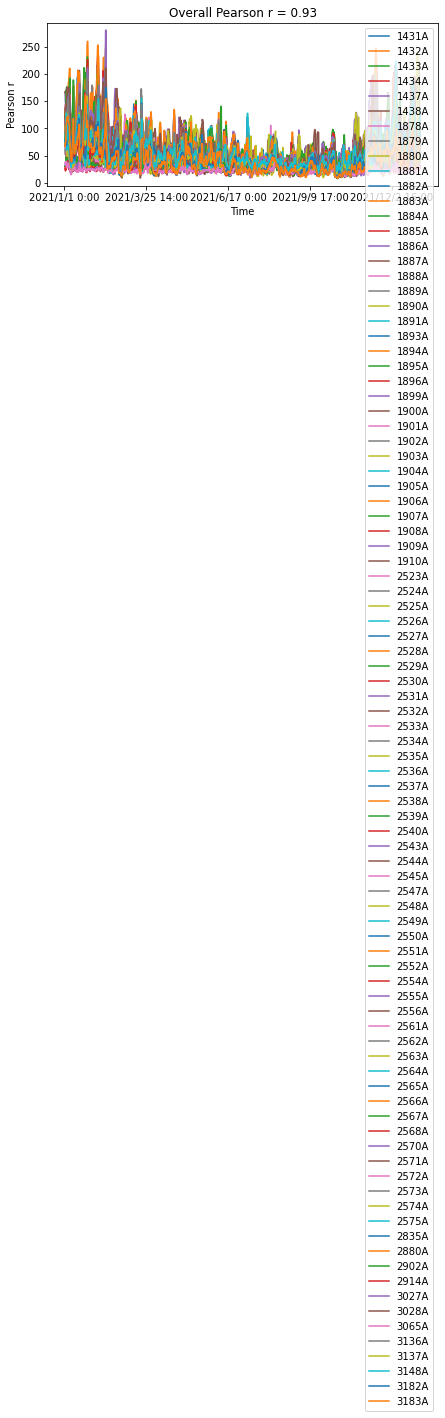

In [54]:
f,ax=plt.subplots(figsize=(7,3))
AQI_data.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
plt.show()